In [2]:
from keras.datasets import imdb
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [3]:
def verctorize_seq(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension), dtype=np.int8)
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

x_train = verctorize_seq(train_data)
x_test = verctorize_seq(test_data)



In [4]:
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')


In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=['accuracy'])
x_val = x_train[:10000]
partitial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partitial_y_train = train_labels[10000:]
history= model.fit(partitial_x_train,
                  partitial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data = (x_val, y_val))



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.5133 - accuracy: 0.7897 - val_loss: 0.4108 - val_accuracy: 0.8449
Epoch 2/20
15000/15000 [==============================] - 1s 54us/step - loss: 0.3055 - accuracy: 0.9027 - val_loss: 0.3123 - val_accuracy: 0.8819
Epoch 3/20
15000/15000 [==============================] - 1s 57us/step - loss: 0.2256 - accuracy: 0.9259 - val_loss: 0.2785 - val_accuracy: 0.8907
Epoch 4/20
15000/15000 [==============================] - 1s 55us/step - loss: 0.1722 - accuracy: 0.9440 - val_loss: 0.2843 - val_accuracy: 0.8869
Epoch 5/20
15000/15000 [==============================] - 1s 56us/step - loss: 0.1390 - accuracy: 0.9569 - val_loss: 0.3202 - val_accuracy: 0.8732
Epoch 6/20
15000/15000 [==============================] - 1s 55us/step - loss: 0.1146 - accuracy: 0.9647 - val_loss: 0.2924 - val_accuracy: 0.8867
Epoch 7/20
15000/15000 [==============================] - 1s 55us/st

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


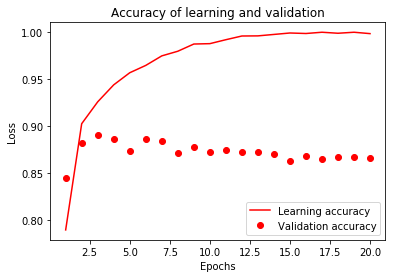

In [10]:
import matplotlib.pyplot as plt

history_info = history.history
print(history_info.keys())

acc = history_info['accuracy']
val_acc = history_info['val_accuracy']
loss = history_info['loss']
val_loss = history_info['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label="Learning accuracy")
plt.plot(epochs, val_acc, 'ro', label="Validation accuracy")
plt.title("Accuracy of learning and validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


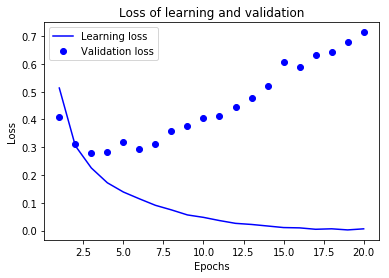

In [11]:
plt.plot(epochs, loss, 'b', label="Learning loss")
plt.plot(epochs, val_loss, 'bo', label="Validation loss")
plt.title("Loss of learning and validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()